In [4]:
import requests
import pandas as pd

# 幣安API的基本URL
base_url = "https://api.binance.com"

# 設定K線圖的參數
symbol = "BTCUSDT"
interval = "1d" # 1天的K線圖
limit = 10 # 最近10天的數據

# 組合API請求的URL
url = f"{base_url}/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}"

# 使用GET請求獲取數據
response = requests.get(url)

print(response.status_code)

# 檢查請求是否成功
if response.status_code == 200:
    # 解析JSON數據
    data = response.json()
    
    # 提取K線圖數據並創建DataFrame
    df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    
    # 將開盤時間從毫秒轉換為日期時間格式
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    
    # 儲存DataFrame為CSV文件
    df.to_csv('btcusdt_klines.csv', index=False)
    print("Data saved to btcusdt_klines.csv")
    print(df.head())
else:
    print("Failed to retrieve data.")


200
Data saved to btcusdt_klines.csv
   Open time            Open            High             Low           Close  \
0 2024-03-16  69499.84000000  70043.00000000  64780.00000000  65300.63000000   
1 2024-03-17  65300.64000000  68904.40000000  64533.00000000  68393.48000000   
2 2024-03-18  68393.47000000  68956.00000000  66565.20000000  67609.99000000   
3 2024-03-19  67610.00000000  68124.11000000  61555.00000000  61937.40000000   
4 2024-03-20  61937.41000000  68100.00000000  60775.00000000  67840.51000000   

            Volume     Close time   Quote asset volume  Number of trades  \
0   55926.95336000  1710633599999  3788544202.88485590           2729019   
1   49742.21589000  1710719999999  3322963634.24251290           2449156   
2   55691.08088000  1710806399999  3768277912.41891810           2464515   
3  101005.32487000  1710892799999  6484805948.53539280           3593832   
4   90420.58592000  1710979199999  5769770052.06258300           3549793   

  Taker buy base asset vo

In [5]:
!pip install python-binance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 4.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 4.7 MB/s eta 0:00:00


In [15]:
!pip install --upgrade seaborn matplotlib mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 791.1 kB/s eta 0:00:00a 0:00:01


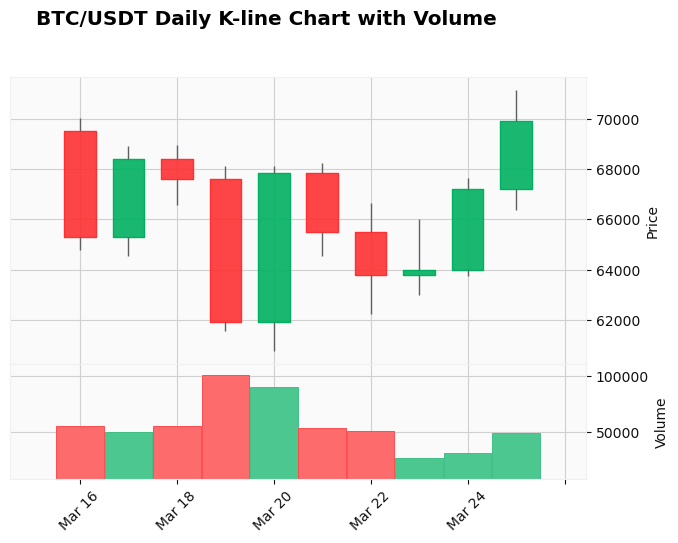

In [22]:
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
import mplfinance as mpf

# 讀取CSV文件
df = pd.read_csv('btcusdt_klines.csv')

# Convert the 'Open time' column to datetime
df['Open time'] = pd.to_datetime(df['Open time'])

# Set 'Open time' as the index
df.set_index('Open time', inplace=True)

# Convert the 'Open', 'High', 'Low', and 'Close' columns to float
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].astype(float)
df['Volume'] = df['Volume'].astype(float)


# Plot the K-line chart with volume
mpf.plot(df, type='candle', style='yahoo', title='BTC/USDT Daily K-line Chart with Volume', volume=True)



Data saved to btcusdt_klines.csv


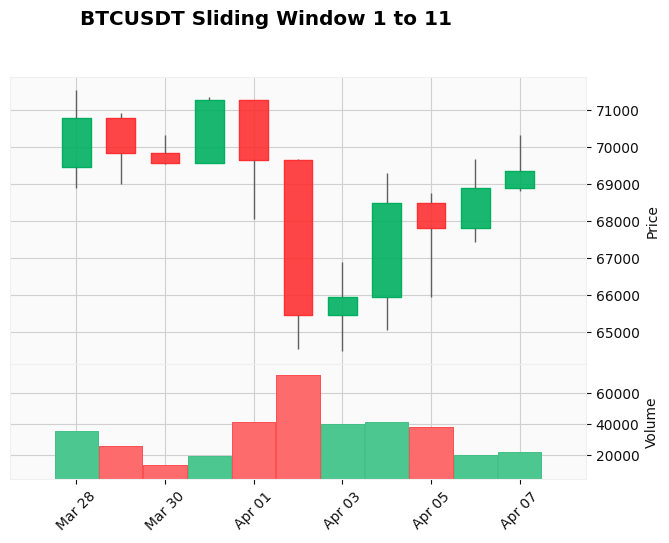

Generated image for window 1 to 11


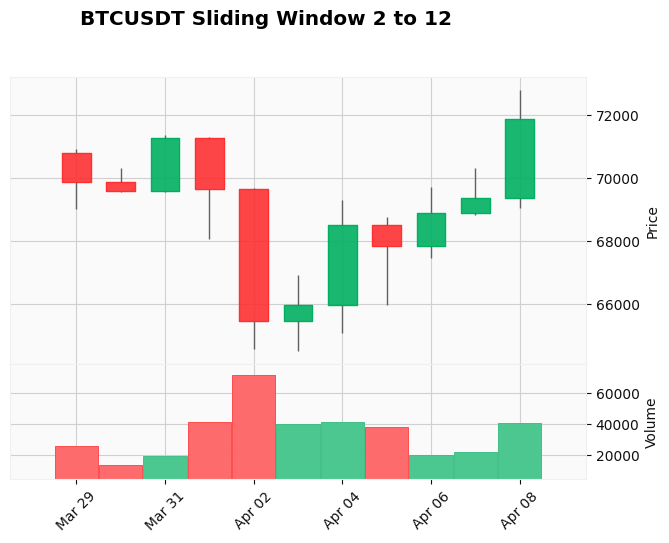

Generated image for window 2 to 12


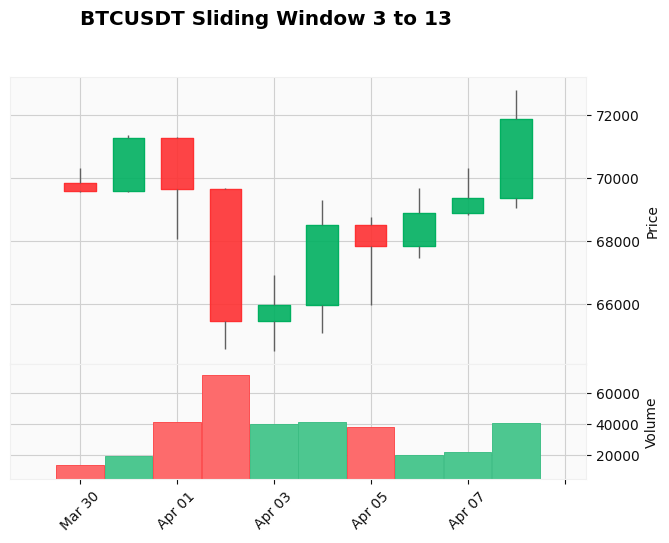

Generated image for window 3 to 13


In [1]:
import requests
import pandas as pd
import mplfinance as mpf

# Function to generate sliding window images
def generate_sliding_window_images(df, start_day, end_day, symbol):
    for i in range(start_day, end_day):
        window_df = df.iloc[i-1:i+10]
        if window_df.shape[0] < 10: # Ensure there are enough data points
            continue
        # Plot the K-line chart with volume for the window
        mpf.plot(window_df, type='candle', style='yahoo', title=f'{symbol} Sliding Window {i} to {i+10}', volume=True)
        print(f"Generated image for window {i} to {i+10}")

# Your existing code to fetch and prepare the data
base_url = "https://api.binance.com"
symbol = "BTCUSDT"
interval = "1d"
limit = 12 # Increased to 12 to include 12 days of data
url = f"{base_url}/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df.to_csv('btcusdt_klines.csv', index=False)
    print("Data saved to btcusdt_klines.csv")
else:
    print("Failed to retrieve data.")

# Read the CSV file
df = pd.read_csv('btcusdt_klines.csv')
df['Open time'] = pd.to_datetime(df['Open time'])
df.set_index('Open time', inplace=True)
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].astype(float)
df['Volume'] = df['Volume'].astype(float)

# Generate sliding window images
generate_sliding_window_images(df, 1, 11, symbol)
